As this code uses Deon's Reddit account to scrape data and relies on models and generated datasets stored on his google drive, it may not be possible to run this code without us sending the required inputs. So in case the project evaluation includes locally testing our code, please contact us for the models and the dataset.

# CONNECTING TO REDDIT API

In [ ]:
pip install praw

     |████████████████████████████████| 176 kB 12.4 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 


In [ ]:
import praw

In [ ]:
pip install pandas

In [ ]:
import pandas as pd

In [ ]:
# Read-only instance
reddit_read_only = praw.Reddit(client_id="MV5gvnbqZC_NZQZkjkiyug",         # your client id
                               client_secret="Ocglk1ZaBh0LFOtr0NvKoZfDo7DCHg",      # your client secret
                               user_agent="Scraping",check_for_async=False)        # your user agent

reddit_authorized = praw.Reddit(client_id="MV5gvnbqZC_NZQZkjkiyug",         # your client id
                                client_secret="Ocglk1ZaBh0LFOtr0NvKoZfDo7DCHg",      # your client secret
                                user_agent="Scraping",        # your user agent
                                username="deonsj",        # your reddit username
                                password="*****",check_for_async=False)        # your reddit password
                               

In [ ]:
print(reddit_authorized.user.me())

deonsj


In [ ]:
subreddit = reddit_read_only.subreddit("SuicideWatch")

In [ ]:
print("Display Name:", subreddit.display_name)

Display Name: SuicideWatch


# EXTRACT POSTS FROM SUBREDDITS

In [ ]:
#Get the data from the subreddits mentioned
def get_subreddits(subreddits, num_posts):
    title = []
    text = []
    post_id = []
    reddit_detail = []

    for sub in subreddits:
        subreddit_obj = reddit_read_only.subreddit(sub)
        for posts in subreddit_obj.top(limit=num_posts):
            title.append(posts.title)
            text.append(posts.selftext)
            post_id.append(posts.id)
            reddit_detail.append(posts.subreddit)

    res_dict = {"id": post_id, "subreddit": reddit_detail,
                "title": title, "text": text}

    return res_dict

In [ ]:
subreddits = ['SuicideWatch', 'depression', 'Anxiety']
df1 = pd.DataFrame(data = get_subreddits(subreddits,5000))

In [ ]:
df1

,id,subreddit,title,text
0,ma96y1,SuicideWatch,It’s kinda funny how quickly one can go from “...,
1,greo4o,SuicideWatch,“If you truly wanted to kill yourself and wasn...,"Yeah because I DONT WANT TO FUCKING DO IT, but..."
2,f9d5go,SuicideWatch,Anyone else not want to die and not want to ki...,
3,kbqsnq,SuicideWatch,My mom died 3 hours ago,I thought id be ready for this some day but i ...
4,e8gjky,SuicideWatch,Raped in front of my girlfriend. feeling like ...,"\n\nI don't know what to say or do, I just fe..."
...,...,...,...,...
2949,hyzc9i,Anxiety,So thankful that I work for an understanding c...,
2950,dcprdp,Anxiety,Anyone else forget how to walk when someone is...,
2951,9guwyy,Anxiety,Slow down. It may feel like you have to keep u...,I've been more mindful about the speed of whic...
2952,mqhxfe,Anxiety,Does anyone ever feel like as soon as you have...,I got blindsided by a bout of anxiety that has...


In [ ]:
subreddits2 = ['movies', 'popular', 'books','Jokes']
df2 = pd.DataFrame(data = get_subreddits(subreddits2,5000))

In [ ]:
df1.to_csv('redditscraping.csv', index=False)

In [ ]:
df2.to_csv('non_suicide_data.csv', index=False)

In [ ]:
# Saved to Google Drive
import os
from google.colab import drive
# Mounting Drive on the file path containing the scraped data.
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/NLP

/content/gdrive/MyDrive/NLP


# MERGE BOTH DATASETS

In [ ]:
df = pd.concat([df1, df2], axis=0)
df.to_csv('mergedData.csv', index=False)

In [ ]:
!ls

glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip  mergedData.csv
glove.6B.200d.txt  glove.6B.50d.txt   lstm.h5


In [ ]:
scrapedData = pd.read_csv("mergedData.csv")
print(scrapedData.head())

       id     subreddit                                              title  \
0  ma96y1  SuicideWatch  It’s kinda funny how quickly one can go from “...   
1  greo4o  SuicideWatch  “If you truly wanted to kill yourself and wasn...   
2  f9d5go  SuicideWatch  Anyone else not want to die and not want to ki...   
3  kbqsnq  SuicideWatch                            My mom died 3 hours ago   
4  e8gjky  SuicideWatch  Raped in front of my girlfriend. feeling like ...   

                                                text  
0                                                NaN  
1  Yeah because I DONT WANT TO FUCKING DO IT, but...  
2                                                NaN  
3  I thought id be ready for this some day but i ...  
4   \n\nI don't know what to say or do, I just fe...  


In [ ]:
scrapedData

,id,subreddit,title,text
0,ma96y1,SuicideWatch,It’s kinda funny how quickly one can go from “...,NaN
1,greo4o,SuicideWatch,“If you truly wanted to kill yourself and wasn...,"Yeah because I DONT WANT TO FUCKING DO IT, but..."
2,f9d5go,SuicideWatch,Anyone else not want to die and not want to ki...,NaN
3,kbqsnq,SuicideWatch,My mom died 3 hours ago,I thought id be ready for this some day but i ...
4,e8gjky,SuicideWatch,Raped in front of my girlfriend. feeling like ...,"\n\nI don't know what to say or do, I just fe..."
...,...,...,...,...
8302,mvh6ts,Jokes,"A Boob, a Vagina and an Asshole are debating",Boob: I give milk to new born babies and I'm a...
8303,g3m3wd,Jokes,We all know where the Big Apple is but does an...,\n\nMinneapolis
8304,fh93cl,Jokes,I was talking to a scammer the other day.,Me: “Hello.”\n\nNOT-Microsoft support: “Hello...
8305,rbp2gb,Jokes,A Politician Dies And Has To Spend Just ONE Da...,A politician dies and ends up standing in fro...


# DATA PREPROCESSING

In [ ]:
pip install nltk

In [ ]:
# Importing the necessary libraries to process the given text
 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
 
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


In [ ]:
# Set of stopwords
stop_words = set(stopwords.words('english'))
 
# Instantiating a lemmatizer
lemmatizer = WordNetLemmatizer()
 
# Function that preprocesses the given text.
def cleanText(post):
    # Splitting the sentence into words
    text = re.sub('[^a-zA-Z]', ' ', post)  #remove special characters
    text = text.lower()   
    text = text.split(' ')
    text = [lemmatizer.lemmatize(word) for word in text]
    #remove stop words
    text = [word for word in text if word not in stop_words]  
    
    cleanedText = ' '.join(text)
    return cleanedText


In [ ]:
scrapedData['text']

0                                                     NaN
1       Yeah because I DONT WANT TO FUCKING DO IT, but...
2                                                     NaN
3       I thought id be ready for this some day but i ...
4        \n\nI don't know what to say or do, I just fe...
                              ...                        
8302    Boob: I give milk to new born babies and I'm a...
8303                                      \n\nMinneapolis
8304     Me: “Hello.”\n\nNOT-Microsoft support: “Hello...
8305     A politician dies and ends up standing in fro...
8306    ...I had tons of private messages from Muslims...
Name: text, Length: 8307, dtype: object

In [ ]:
scrapedData['title']

0       It’s kinda funny how quickly one can go from “...
1       “If you truly wanted to kill yourself and wasn...
2       Anyone else not want to die and not want to ki...
3                                 My mom died 3 hours ago
4       Raped in front of my girlfriend. feeling like ...
                              ...                        
8302         A Boob, a Vagina and an Asshole are debating
8303    We all know where the Big Apple is but does an...
8304            I was talking to a scammer the other day.
8305    A Politician Dies And Has To Spend Just ONE Da...
8306     After my joke last week about the Holy Qur'an...
Name: title, Length: 8307, dtype: object

In [ ]:
import numpy as np

# ASSIGNING LABELS AND CLEANING THE DATASET 

In [ ]:
labels = scrapedData['subreddit'].tolist()

#Assigning labels to the dataset
actualLabels = []
for i in range(len(labels)):
  if (labels[i] == 'SuicideWatch' or labels[i] == 'depression' or labels[i] == 'Anxiety'):
    actualLabels.append(1)
  else:
    actualLabels.append(0)

postText = scrapedData['text'].tolist()
postTitle = scrapedData['title'].tolist()

l = len(postText)

corpus = []

for i in range(l):
  s = postTitle[i]
  if (type(postText[i]) != float):
    s += ' '
    s += postText[i]
  #Preprocessing fucntion run for each (postTitle + postText)
  corpus.append(cleanText(s))

In [ ]:
print(actualLabels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# CONVERTING TEXT TO VECTOR

IMPORT LIBRARIES

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

 TFIDF VECTORIZATION

In [ ]:
tf = TfidfVectorizer(ngram_range = (1, 2))

In [ ]:
tf_vec = tf.fit_transform(corpus)

# SPLIT DATASET TO TRAIN,TEST DATA (70% TRAIN,30% TEST)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(tf_vec, actualLabels, test_size = 0.3, shuffle = True, random_state = 42,)

# NAIVE BAYES CLASSIFICATION

In [ ]:
#Tuning of hyperparameter alpha
parameters = {"alpha":[0.001, 0.005, 0.01, 0.075, 0.05, 0.025, 0.1, 0.25, 0.5, 0.75, 1, 5, 10, 50]}

#GridSearchCV does an exhaustive search over specified parameter values for an estimator
clf= GridSearchCV(MultinomialNB(),parameters, cv=10, scoring= "accuracy", return_train_score= True)
clf.fit(x_train, y_train)

#best value of alpha
alpha= clf.best_params_["alpha"] 
score= clf.best_score_
print("Best alpha value is ", alpha)
print("Best score value is ", score)

Best alpha value is  1
Best score value is  0.965253650833082


In [ ]:
#Best value of alpha is 0.5 and we us that with MultinomialNB
model1= MultinomialNB(alpha=1)
model1.fit(x_train, y_train)
y_pred= model1.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1579
           1       0.95      0.95      0.95       914

    accuracy                           0.96      2493
   macro avg       0.96      0.96      0.96      2493
weighted avg       0.96      0.96      0.96      2493



CONFUSION MATRIX

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


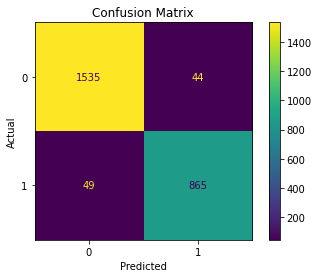

In [ ]:
plot_confusion_matrix(model1, x_test,y_test)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# LSTM MODEL

In [ ]:
""" Implementing an LSTM Model """

# Importing necessary libraries.

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# TOKENIZER (VECTORIZATION)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

In [ ]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

In [ ]:
sequence = tokenizer.texts_to_sequences(corpus)
padded_sequence = pad_sequences(sequence, padding = 'post')

# TRAIN,TEST SPLIT

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(padded_sequence, actualLabels, test_size = 0.3, shuffle = True, random_state = 42)

# GLoVE EMBEDDING MATRIX

In [ ]:
# Used a api of globe for faster access
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2022-04-21 11:47:48--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-04-21 11:47:48--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-04-21 11:47:49--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
embeddings_index = {}
with open('glove.6B.100d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = values[1:]
        vector = np.asarray(vector, dtype='float32')
        embeddings_index[word] = vector

embeddings_matrix = np.zeros((vocab_size,100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector

# LSTM MODEL

In [ ]:
model = Sequential()

model.add(Embedding(vocab_size, 100, weights = [embeddings_matrix], trainable = False))
model.add(Bidirectional(LSTM(32, return_sequences = True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         2100200   
                                                                 
 bidirectional (Bidirectiona  (None, None, 64)         34048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,161,193
Trainable params: 60,993
Non-tra

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

history = model.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
182/182 [==============================] - 375s 2s/step - loss: 0.2434 - accuracy: 0.9061 - val_loss: 0.1565 - val_accuracy: 0.9418
Epoch 2/10
182/182 [==============================] - 366s 2s/step - loss: 0.1374 - accuracy: 0.9493 - val_loss: 0.1341 - val_accuracy: 0.9491
Epoch 3/10
182/182 [==============================] - 368s 2s/step - loss: 0.1098 - accuracy: 0.9589 - val_loss: 0.1235 - val_accuracy: 0.9523
Epoch 4/10
182/182 [==============================] - 364s 2s/step - loss: 0.0982 - accuracy: 0.9623 - val_loss: 0.0985 - val_accuracy: 0.9671
Epoch 5/10
182/182 [==============================] - 357s 2s/step - loss: 0.0803 - accuracy: 0.9696 - val_loss: 0.0915 - val_accuracy: 0.9671
Epoch 6/10
182/182 [==============================] - 358s 2s/step - loss: 0.0625 - accuracy: 0.9788 - val_loss: 0.0951 - val_accuracy: 0.9675
Epoch 7/10
182/182 [==============================] - 358s 2s/step - loss: 0.0575 - accuracy: 0.9807 - val_loss: 0.0933 - val_accuracy: 0.9679

In [ ]:
model.evaluate(x_test,y_test)

78/78 [==============================] - 70s 892ms/step - loss: 0.1021 - accuracy: 0.9715


[0.10208655893802643, 0.9715202450752258]

In [ ]:
model.save('./lstm.h5')

In [ ]:
pred = model.predict(x_test)

In [ ]:
pred = pred>0.5

In [ ]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98      1608
        True       0.95      0.98      0.96       885

    accuracy                           0.97      2493
   macro avg       0.97      0.97      0.97      2493
weighted avg       0.97      0.97      0.97      2493



# LOAD SAVED MODEL

In [ ]:
from tensorflow.keras.models import load_model
lstm_model=load_model("lstm.h5")

In [ ]:
pred_lstm = lstm_model.predict(x_test)

In [ ]:
pred_lstm = pred_lstm >0.5

In [ ]:
print(classification_report(pred_lstm, y_test))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98      1608
        True       0.95      0.98      0.96       885

    accuracy                           0.97      2493
   macro avg       0.97      0.97      0.97      2493
weighted avg       0.97      0.97      0.97      2493



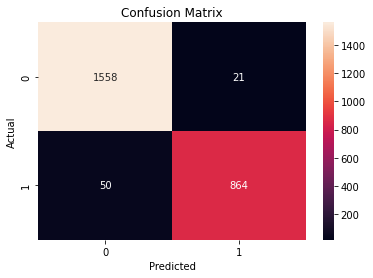

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_lstm)
f = sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# TESTING LSTM AND NAIVE BAYES

In [ ]:
def predict_naiveb(model,s):
    new_text = cleanText(s)
    vec = tf.transform([new_text])
    res = model.predict(vec)
    return res 

In [ ]:
def predict_lstm(model,s):
    new_text = cleanText(s)
    sequence = tokenizer.texts_to_sequences([new_text])
    padded_sequence = pad_sequences(sequence,padding='post',)
    res = model.predict(padded_sequence)
    return res[0]

In [ ]:
text = ['I dont want to live any more','Tie the rope','Tie the rope!!! I want to die',
        'My dog died in an accident','I want to take my own life','I want to end it all','I am fed up of seeing RCB performance','Live long and prosper']

In [ ]:
for t in text:
    res = predict_naiveb(model1,t)
    print("{} - {}".format(t, res[0]>0.50))

I dont want to live any more - True
Tie the rope - False
Tie the rope!!! I want to die - True
My dog died in an accident - False
I want to take my own life - True
I want to end it all - True
I am fed up of seeing RCB performance - False
Live long and prosper - True


In [ ]:
for t in text:
    res = predict_lstm(lstm_model,t)
    print("{} :{:.2f} - {}".format(t, res[0],res[0] > 0.5))

I dont want to live any more :0.90 - True
Tie the rope :0.17 - False
Tie the rope!!! I want to die :0.70 - True
My dog died in an accident :0.37 - False
I want to take my own life :0.94 - True
I want to end it all :0.62 - True
I am fed up of seeing RCB performance :0.26 - False
Live long and prosper :0.50 - True
